# Ex - 4
## BigGIS for BigDATA (Quantum Computing)
### Ashutosh Kumar Jha (Scientist/Engineer SF), IIRS, ISRO
### Sudikin Pramanik (Quantum computing coordinator), Student, IIRS, ISRO
`Running a quantum circuit`

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import Aer

Calling the Qiskit primitives from the ibm_runtime

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2, EstimatorV2


We are loading our account here.

In [ ]:
QiskitRuntimeService.save_account(channel='ibm_quantum', token='your api', overwrite=True)

In [4]:
service = QiskitRuntimeService()

IBMNotAuthorizedError: '401 Client Error: Unauthorized for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

Looking at the backend services available

In [ ]:
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

Using a sampler

Creating a GHz state

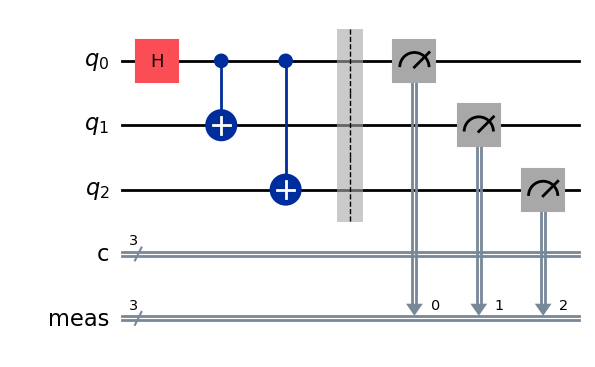

In [ ]:
# Make a quantum circuit
qc = QuantumCircuit(3, 3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure_all()
display(qc.draw(output="mpl"))

# Running on Aer simulator

In [ ]:
# Use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
results = aer_sim.run(qc, shots=shots).result()
sim_counts = results.get_counts()

print(sim_counts)

{'000 000': 2027, '111 000': 2069}


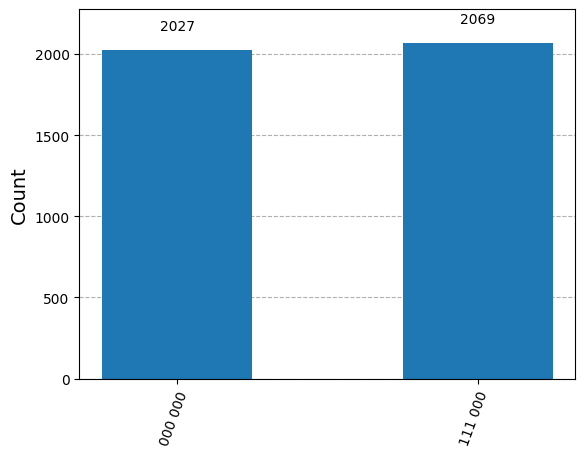

In [ ]:
plot_histogram(sim_counts)

# Running on Fake Sherbrooke

In [ ]:

from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
backend_man = FakeManilaV2()


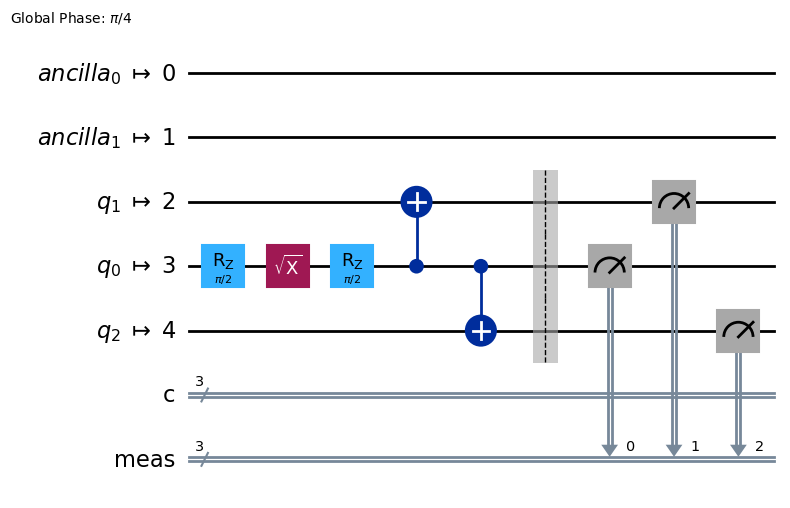

In [ ]:
qc_man= transpile(qc, backend_man)
qc_man.draw('mpl', style="iqp")

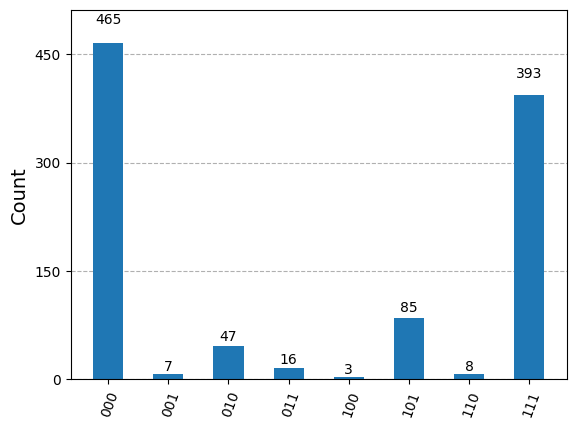

In [ ]:
sampler = SamplerV2(backend_man)
job = sampler.run([qc_man])
pub_result = job.result()[0]
counts = pub_result.data.meas.get_counts()
plot_histogram(counts)

# Running on real quantum computer

In [ ]:
backend = service.least_busy(min_num_qubits=127, operational=True)
backend

<IBMBackend('ibm_brisbane')>

In [ ]:
qc2=transpile(qc, backend)


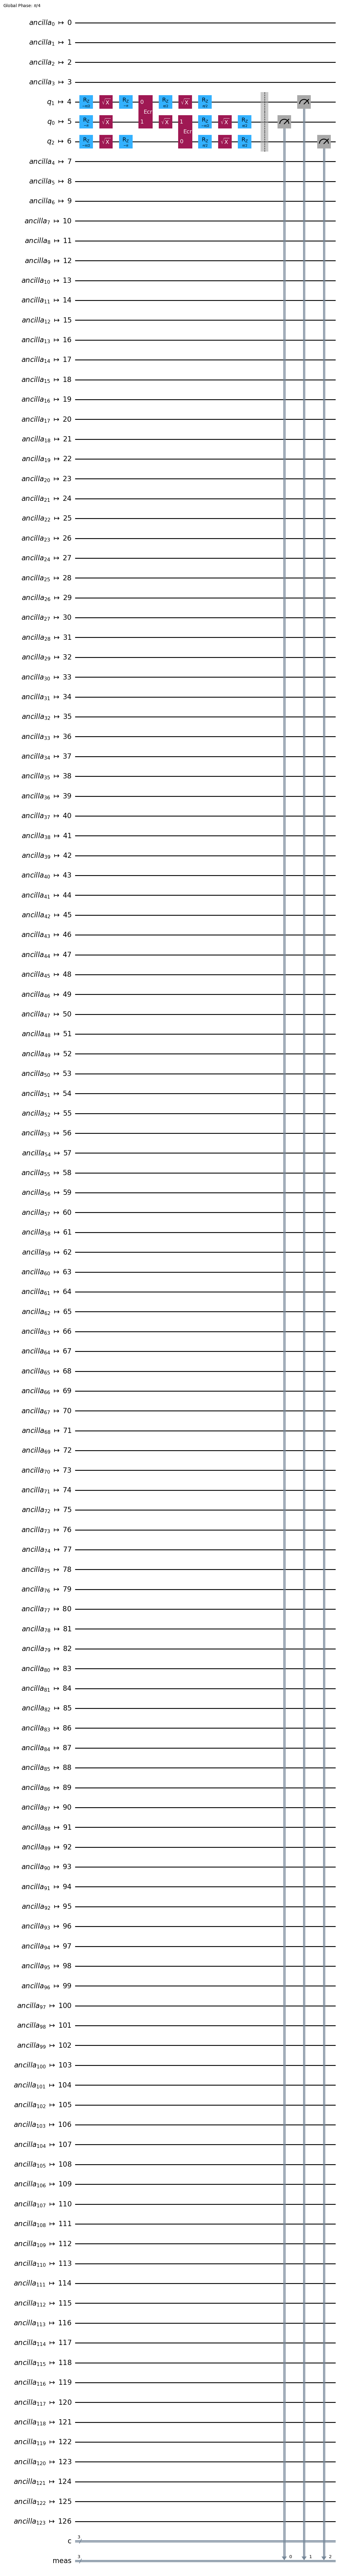

In [ ]:
qc2.draw('mpl')

In [ ]:
job=backend.run(qc2)
print(job.job_id)

C:\Users\opoda\AppData\Local\Temp\ipykernel_4144\2252520854.py:1: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job=backend.run(qc2)


<bound method JobV1.job_id of <RuntimeJob('cwvcr1r997wg008xv6fg', 'circuit-runner')>>


In [ ]:
result = job.result()

In [ ]:
counts = result.get_counts(qc2)
print("Result of the quantum circuit:", counts)

Result of the quantum circuit: {'000 000': 1908, '110 000': 14, '001 000': 4, '101 000': 46, '111 000': 1920, '100 000': 37, '011 000': 19, '010 000': 52}


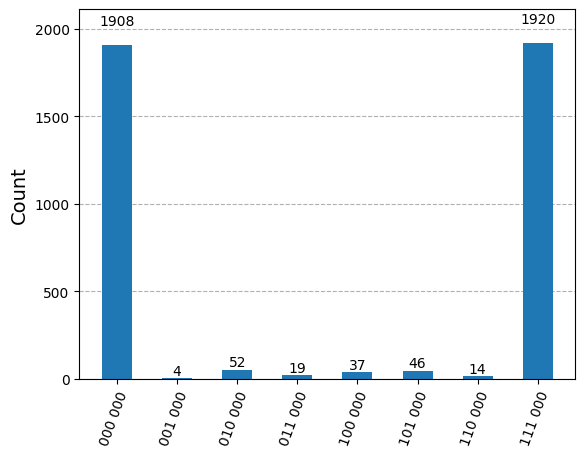

In [ ]:
plot_histogram(counts)